In [6]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt

In [7]:
tt = pd.read_csv("aic1.txt", header = None)
x = tt.values[:,0]
y = tt.values[:,1]
x = x[:, np.newaxis]
X = np.hstack((0*x + 1, x))
clr = sklearn.linear_model.LinearRegression()
clr.fit(X, y)
y_pred = clr.predict(X)

E = sum((y - y_pred)**2)

In [8]:
def AIC(N, p, e):
    return N*np.log(e/N)+2*(p+2)

AIC:  -73.85379954456766


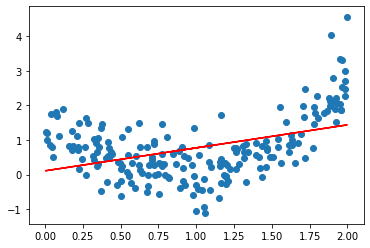

In [9]:
#First degree polynomial
power = 1
aic = AIC(len(y), power, E)
print('AIC: ', aic)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [10]:
#2-11 degree polynomials
for p in range(2, 12):
    X = np.hstack((X, x ** p))
    clr = sklearn.linear_model.LinearRegression()
    clr.fit(X, y)
    y_pred = clr.predict(X)

    E = sum((y - y_pred)**2)
    aic2 = AIC(len(y), p, E)
    
    if aic > aic2:
        aic = aic2
        degree = p
print("AIC: ", aic)
print("Polynomial degree: ", degree)

AIC:  -241.4595481425123
Polynomial degree:  3
